# Import Package and Read Data

In [1]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd
import numpy as np   #Linear algera Library
import matplotlib.pyplot as plt  #to plot graphs
import seaborn as sns  #to plot graphs
from sklearn.linear_model import LinearRegression   #for linear regression model  #setting seaborn as default 
import math
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings('ignore')
# Next, we'll load the dataset, which is in the "../input/" directory
dior = pd.read_excel("DIOR stock prices.xlsx")
dior.head()


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Unnamed: 8,Unnamed: 9
0,1999-12-31,CDI.PA,32.674278,61.500000,61.500000,61.500000,61.500000,0,NaN,NaN
1,2000-01-03,CDI.PA,32.844299,61.820000,63.950001,61.750000,62.200001,424416,NaN,historical daily stock prices from 2000-2022
2,2000-01-04,CDI.PA,29.688440,55.880001,62.619999,55.680000,62.619999,1132848,NaN,CDI.PA = Christian Dior
3,2000-01-05,CDI.PA,27.892687,52.500000,54.750000,52.150002,54.619999,962416,NaN,NaN
4,2000-01-06,CDI.PA,27.016062,50.849998,53.020000,50.849998,53.020000,813360,NaN,NaN


In [2]:
# Let's see how many examples we have of each Symbol
dior["Symbol"].value_counts()

CDI.PA    5729
Name: Symbol, dtype: int64

# Data Preprocessing

In [3]:
dior.isnull().sum()

Date             0
Symbol           0
Adj Close        0
Close            0
High             0
Low              0
Open             0
Volume           0
Unnamed: 8    5729
Unnamed: 9    5727
dtype: int64

# there are two coulmns have zero values which we are not consider for calculation

In [4]:
df=dior.copy()

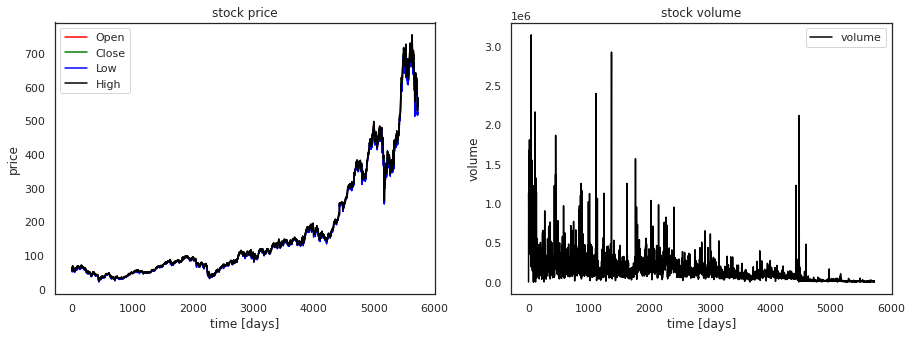

In [5]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df.Symbol == 'CDI.PA'].Open.values, color='red', label='Open')
plt.plot(df[df.Symbol == 'CDI.PA'].Close.values, color='green', label='Close')
plt.plot(df[df.Symbol == 'CDI.PA'].Low.values, color='blue', label='Low')
plt.plot(df[df.Symbol == 'CDI.PA'].High.values, color='black', label='High')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df[df.Symbol == 'CDI.PA'].Volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

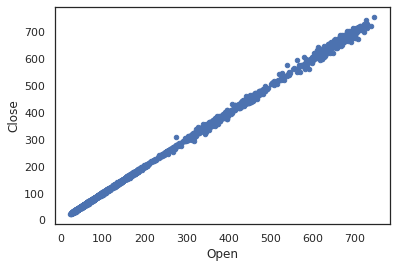

In [6]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the dior stock features.
dior.plot(kind="scatter", x="Open", y="Close")

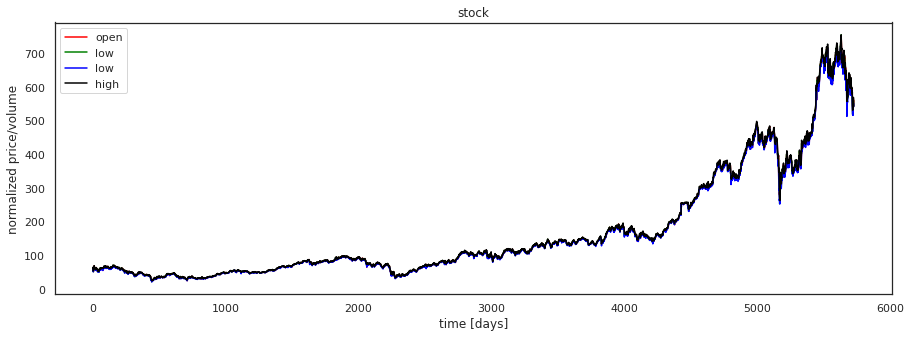

In [7]:
plt.figure(figsize=(15, 5));
plt.plot(df.Open.values, color='red', label='open')
plt.plot(df.Close.values, color='green', label='low')
plt.plot(df.Low.values, color='blue', label='low')
plt.plot(df.High.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

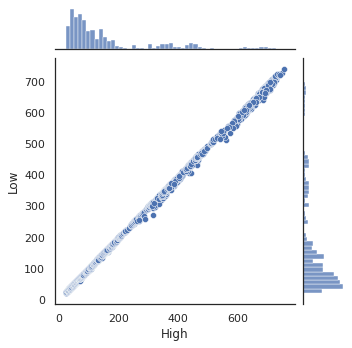

In [8]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="High", y="Low", data=dior, size=5)

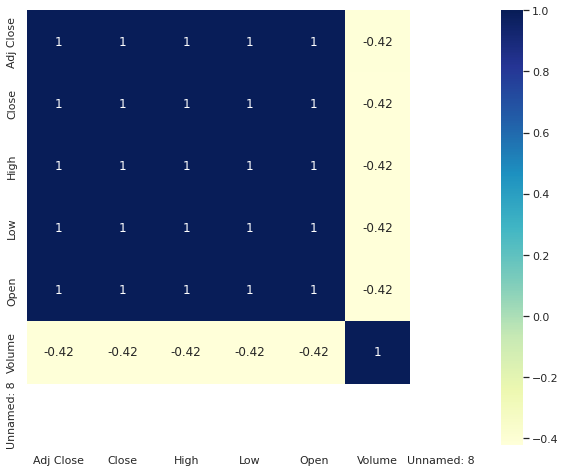

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(dior.corr(),cmap="YlGnBu", annot=True)
plt.show()

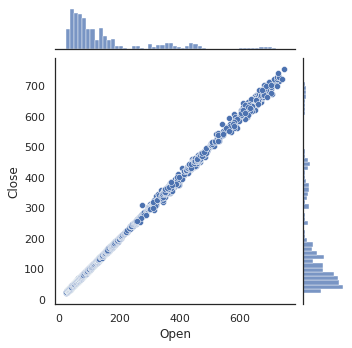

In [10]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="Open", y="Close", data=dior, size=5)

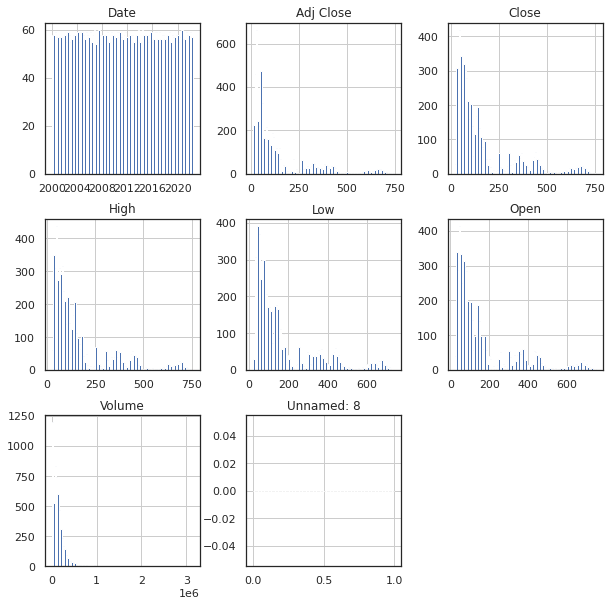

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
df.hist(bins=100, ax=ax1)
ax1.set_ylabel('Open')
ax1.set_xlabel('Close')

plt.show()

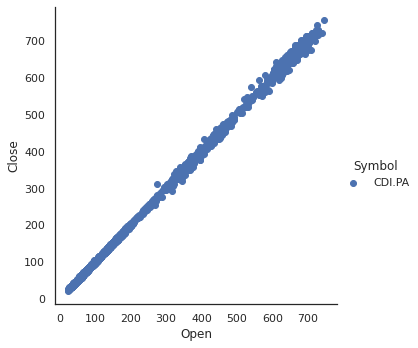

In [12]:

# We'll use seaborn's FacetGrid to color the scatterplot by Symbol
sns.FacetGrid(dior, hue="Symbol", size=5) \
   .map(plt.scatter, "Open", "Close") \
   .add_legend()

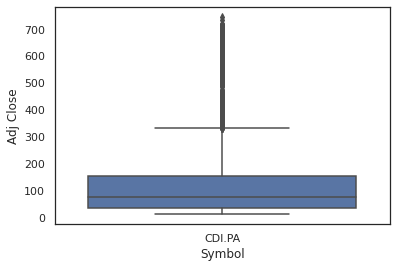

In [13]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Symbol", y="Adj Close", data=dior)

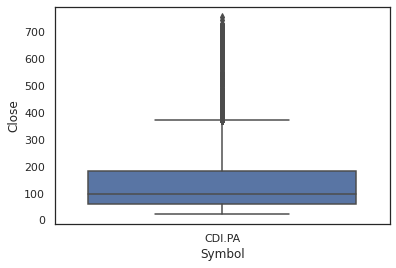

In [14]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Symbol", y="Close", data=dior)

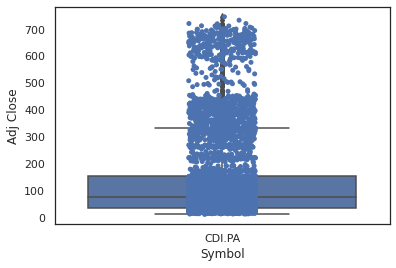

In [15]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Symbol", y="Adj Close", data=dior)
ax = sns.stripplot(x="Symbol", y="Adj Close", data=dior, jitter=True, edgecolor="gray")

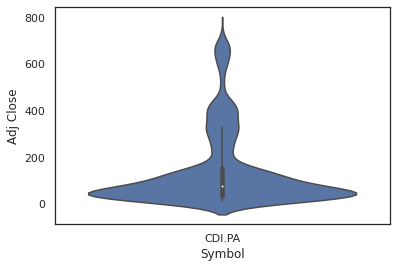

In [16]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Symbol", y="Adj Close", data=dior, size=6)

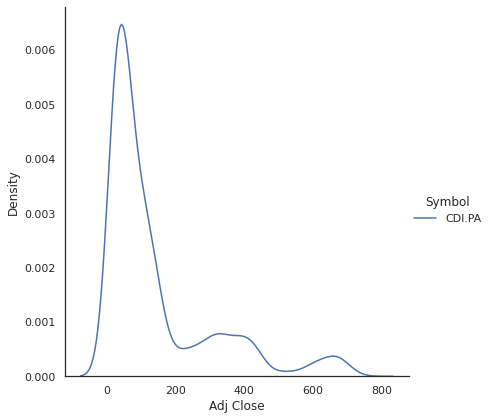

In [17]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(dior, hue="Symbol", size=6) \
   .map(sns.kdeplot, "Adj Close") \
   .add_legend()

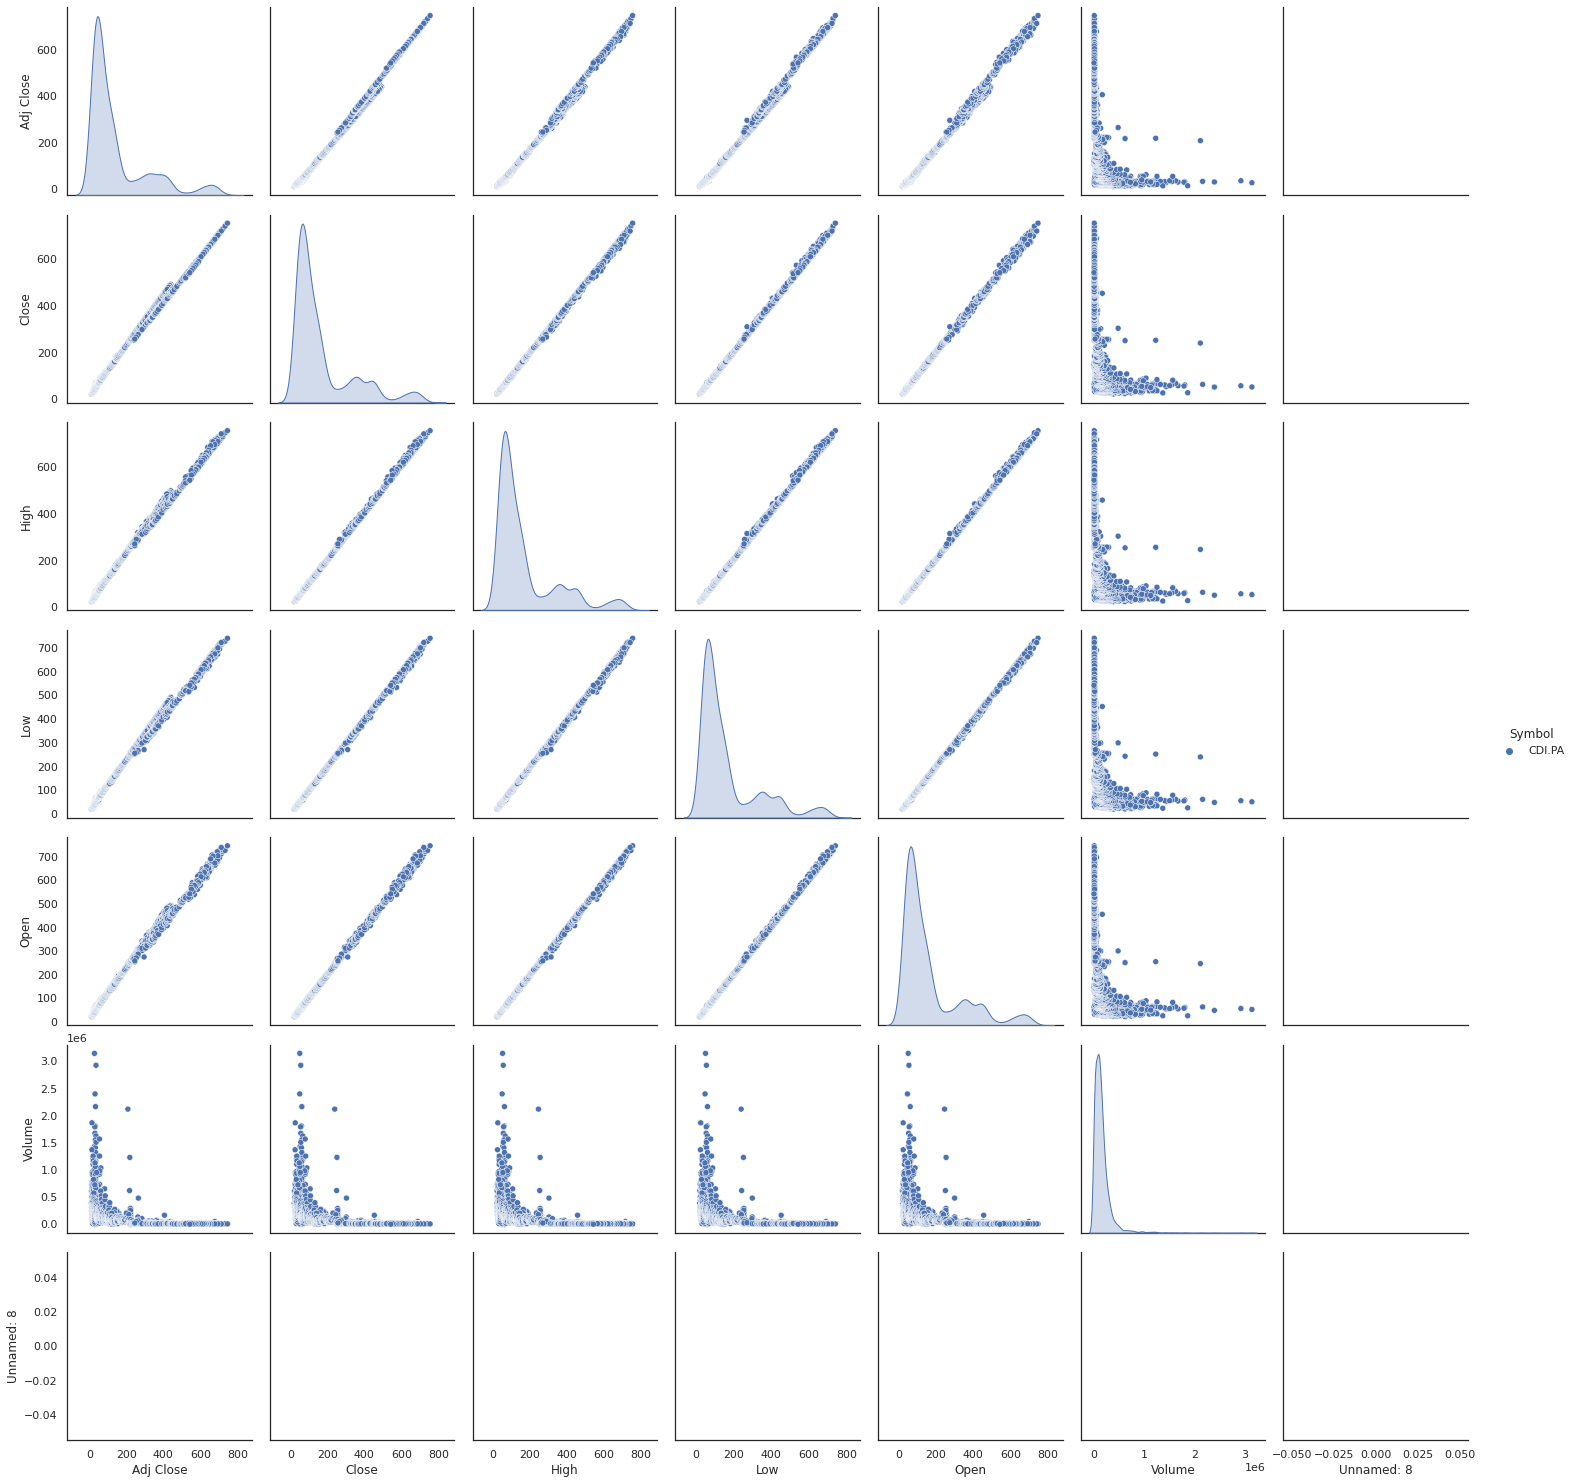

In [18]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features

sns.pairplot(dior.drop("Date", axis=1), hue="Symbol", size=3)

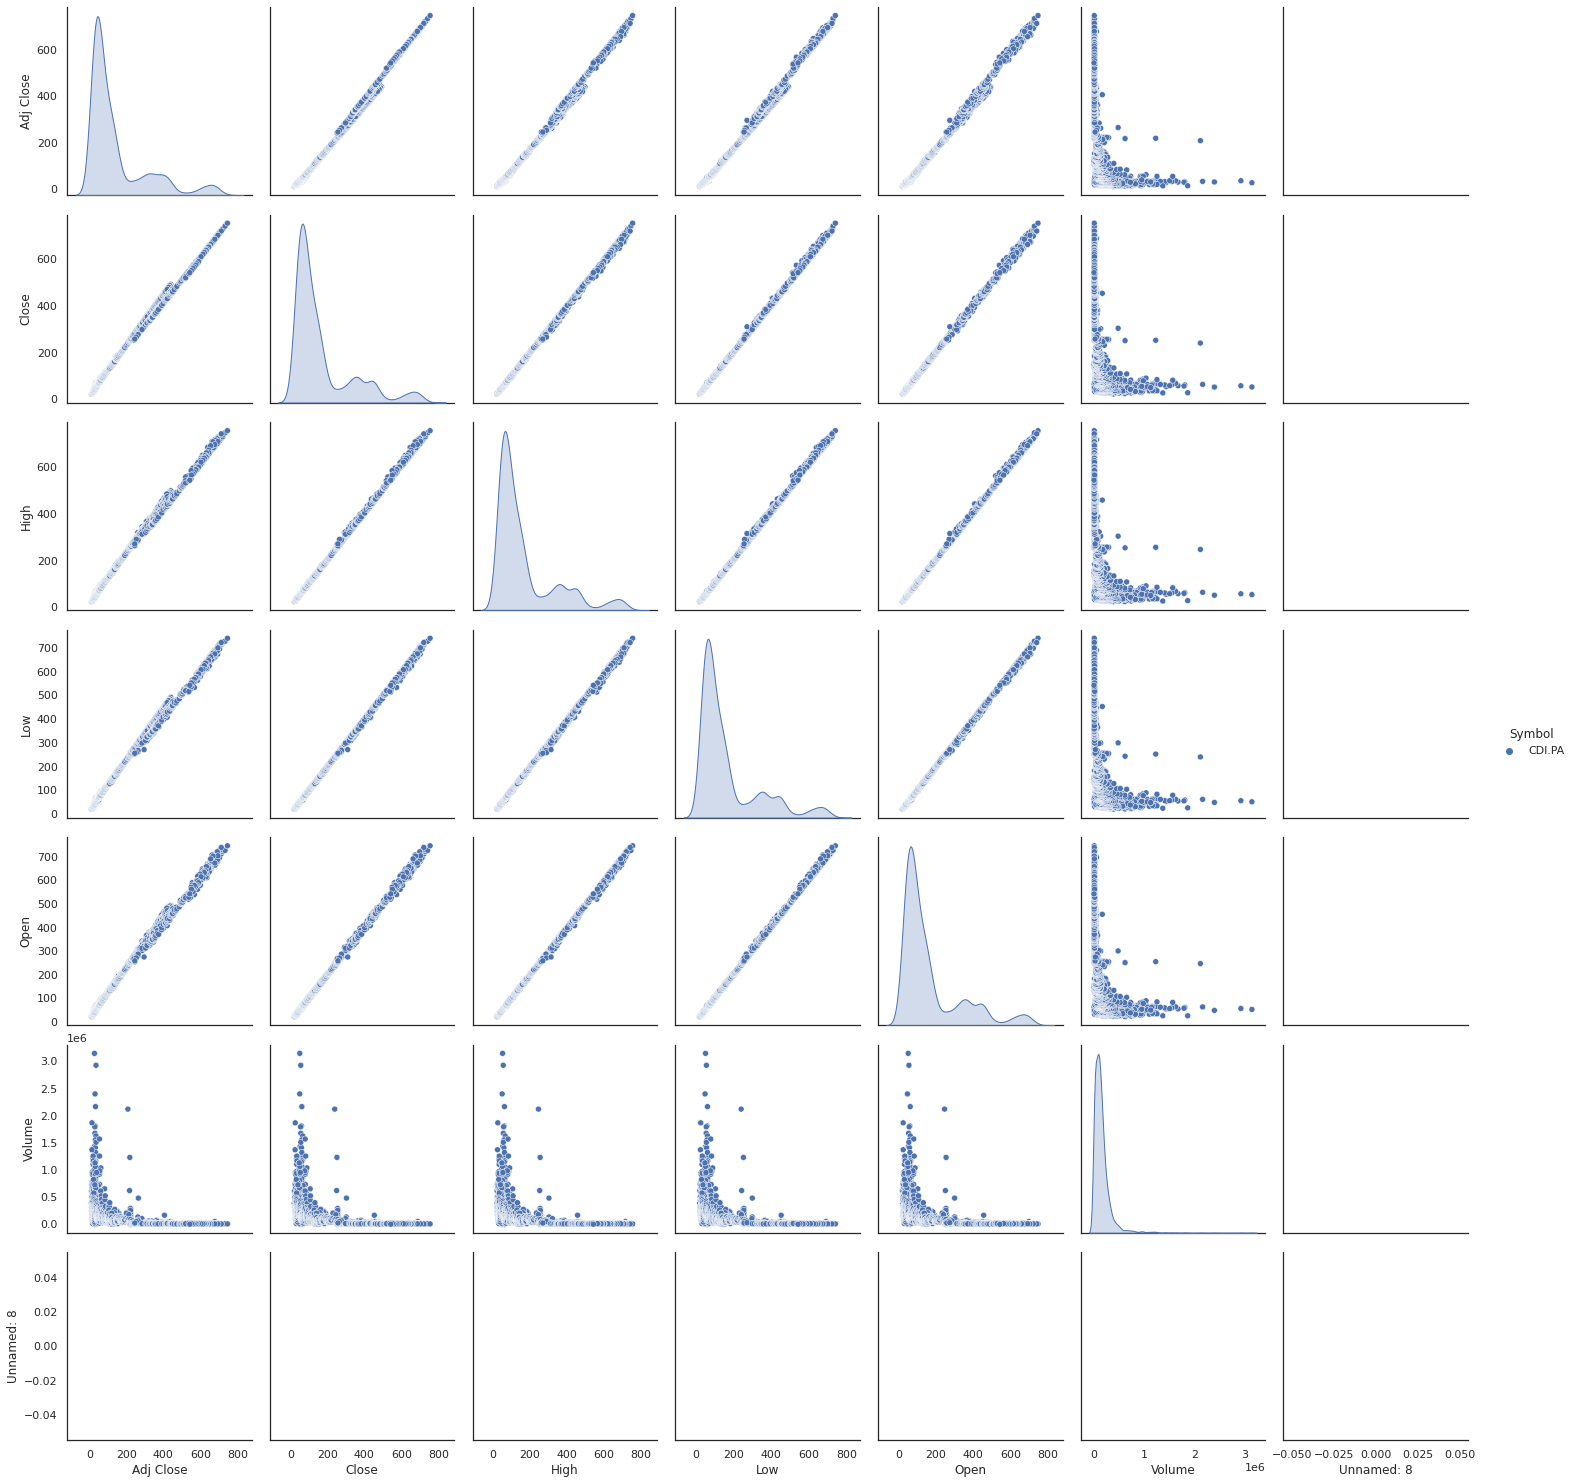

In [19]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(dior.drop("Date", axis=1), hue="Symbol", size=3, diag_kind="kde")

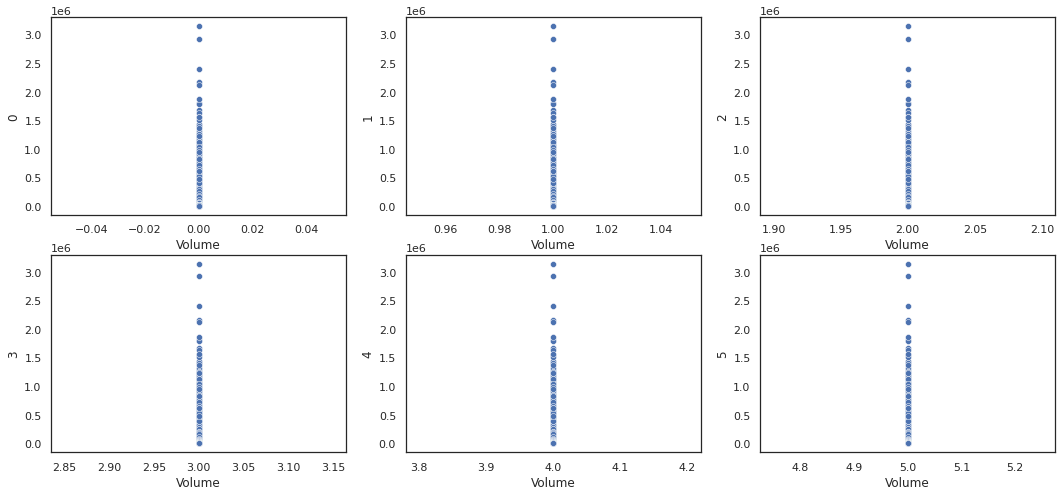

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

axs = axs.flatten()
for i, col in enumerate(list(dior.index[:6])):
    sns.scatterplot(y='Volume', x=col, ax=axs[i], data=dior)
    axs[i].set_xlabel('Volume')
    axs[i].set_ylabel(col)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73719d2070>,
      dtype=object)

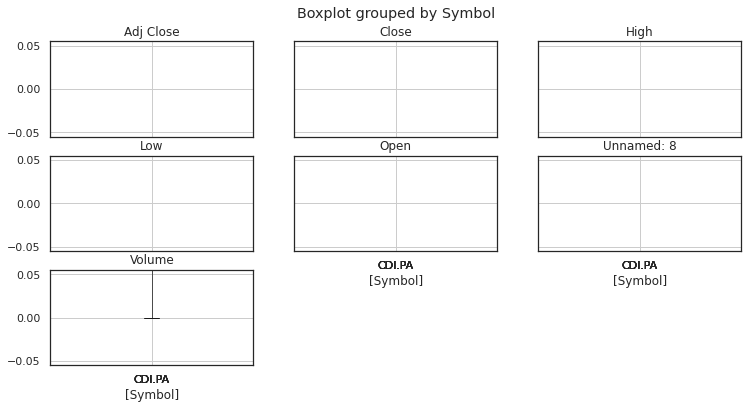

In [21]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by Symbol
dior.drop("Date", axis=1).boxplot(by="Symbol", figsize=(12, 6))

# Time Series Prediction

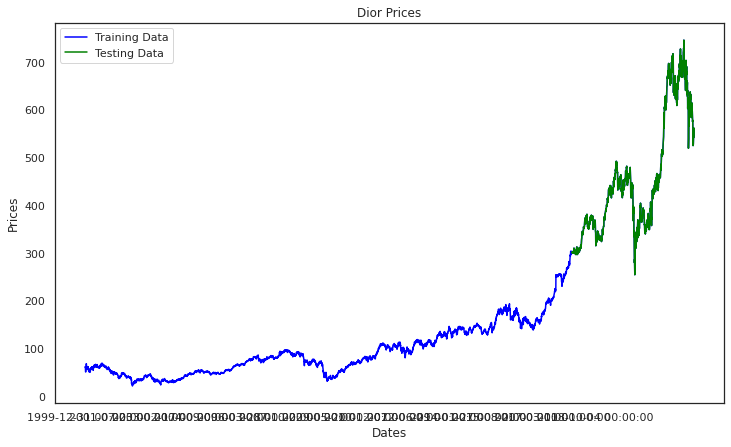

In [22]:
train_data, test_data = dior[0:int(len(dior)*0.8)], dior[int(len(dior)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Dior Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(dior['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,5000, 400), dior['Date'][0:5000:400])
plt.legend()

# Feature Selection (Consider Column for Regression)

In [23]:
#  we use open,high,low,Adj Close to predict  close price
x=dior[['High','Low','Adj Close','Open']].values   #input
y=dior[['Close']].values   #output

# Data Split

In [24]:
from sklearn.model_selection import train_test_split 
#split to train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [25]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (4583, 4)
y_train.shape =  (4583, 1)
x_test.shape =  (1146, 4)
y_test.shape =  (1146, 1)


# linear regression

In [26]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [27]:
lm.coef_

array([[ 0.63918616,  0.84015144,  0.03882131, -0.51592858]])

In [28]:
#values from 0 to 1
#0 model explain None of the variability
#1 model explain Entire of the variability
lm.score(x_train,y_train)

0.9999075709692843

# Model Prediction using test data

In [29]:
#predict the output(predictions) using the test data
predictions = lm.predict(x_test)
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

0.9998638489031773

# Compare the actual and predicted values

In [30]:
#load actual and predecited values side by side
dframe=pd.DataFrame({'actual':y_test.flatten(),'Predicted':predictions.flatten()}) 
#flatten toget single axis of data (1 dimension only)
dframe.head(10)

,actual,Predicted
0,99.889999,99.443762
1,83.599998,83.060797
2,55.500000,55.853165
3,67.050003,67.019461
4,33.900002,33.970030
5,77.500000,77.980660
6,64.900002,65.183197
7,50.000000,50.229588
8,505.500000,505.117539
9,362.799988,362.749614


In [31]:
#metrics to find accuracy of continous variables
import math
from sklearn import metrics
print('Mean Abs value:' ,metrics.mean_absolute_error(y_test,predictions))
print('Mean squared value:',metrics.mean_squared_error(y_test,predictions))
print('root mean squared error value:',math.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Abs value: 0.9626937349022824
Mean squared value: 3.5955516992104
root mean squared error value: 1.8961940035793807


# Result Analysis

Text(0, 0.5, 'Closing price')

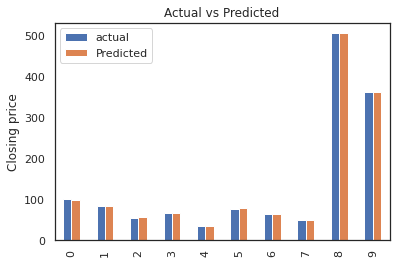

In [32]:
graph =dframe.head(10)
graph.plot(kind='bar')
plt.title('Actual vs Predicted')
plt.ylabel('Closing price')

Text(0, 0.5, 'Predicted')

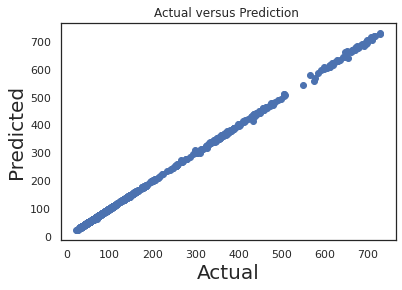

In [33]:
#using scatter plot compare the actual and predicted data
fig = plt.figure()
plt.scatter(y_test,predictions)
plt.title('Actual versus Prediction ')
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20) 

In [34]:
# Repeated K-fold cross validation
from sklearn.model_selection import KFold
import time
# Start counting time
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import mean_squared_error

SEED = 42
kfolds = KFold(n_splits=10, shuffle=True, random_state=SEED)

# Return root mean square error of model prediction (Used for test prediction)
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# Return root mean square error applied cross validation (Used for training prediction)
def evaluate_model_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

Linear Regression rmse after training: 1.8961940035793807
Computational runtime of this algo: 0.1 seconds



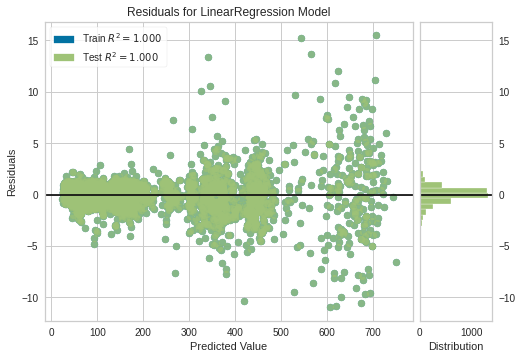

In [35]:
start = time.perf_counter()
visualizer = ResidualsPlot(lm)
visualizer.fit(x_train, y_train)
visualizer.score(x_train, y_train)
model = lm.fit(x_train,y_train)
rmse_result = rmse(y_test, model.predict(x_test))
print(f'Linear Regression rmse after training: {rmse_result}')
# Compute time for executing each algo
run = time.perf_counter() - start
print(f'Computational runtime of this algo: {round(run, 2)} seconds\n')
visualizer.show()

# reg plot

Text(0, 0.5, 'Predicted')

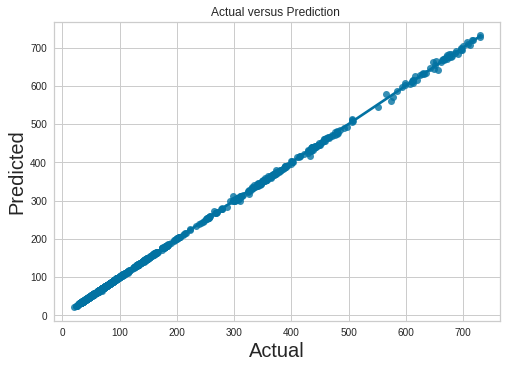

In [36]:
#trying the same with a reg plot(optonal)
sns.regplot(y_test,predictions)
plt.title('Actual versus Prediction ')
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20)   

# residplot

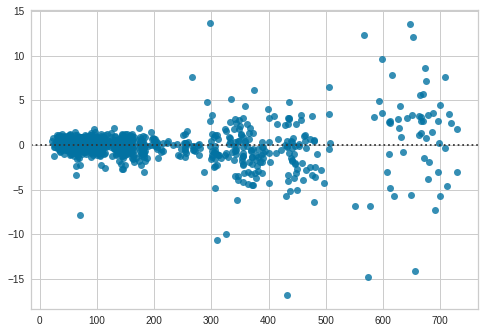

In [37]:
sns.residplot(y_test,predictions)
plt.savefig("out.png")